In [1]:
import numpy as np
import matplotlib.pyplot as plt
import piecewise_regression
import pandas as pd
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj][0]

In [3]:
Lathed_I18_1_3 = pd.read_csv('Data/I-18 Lathed test 3_10242023_165444.csv') 
PSf_15wt_3 = pd.read_csv('Data/15% 30min RT - 1 - 3_07262023_145717.csv')
data_list = [Lathed_I18_1_3, PSf_15wt_3]
# convert in to um
for df in data_list:
    df['S:LVDT (um)'] = df['S:LVDT (in)'] * 25.4 * 1000

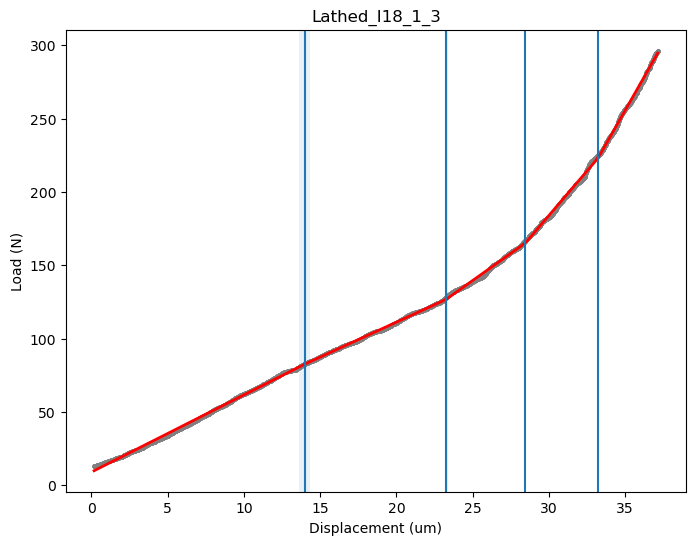


                    Breakpoint Regression Results                     
No. Observations                     2870
No. Model Parameters                   10
Degrees of Freedom                   2860
Res. Sum of Squares                2586.9
Total Sum of Squares          1.70647e+07
R Squared                        0.999848
Adjusted R Squared               0.999848
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                 9.0774       0.0625       145.14           0.0       8.9548          9.2
alpha1               5.26018      0.00767       685.92           0.0       5.2451       5.2752
beta1              -0.500876       0.0157      -31.979             -     -0.53159     -0.47017
beta2                2.64136       0.0353       74.897             -       2.5722       2.7105
beta3            

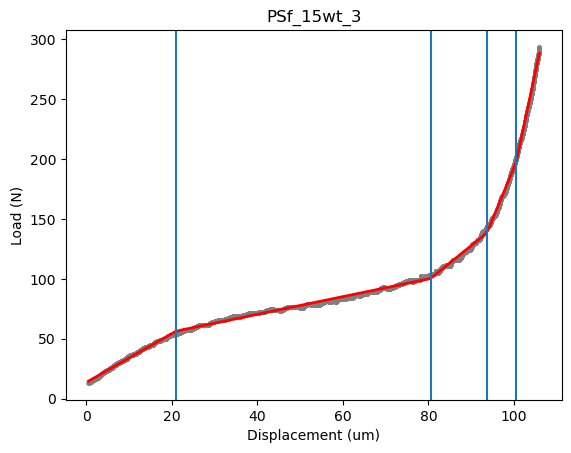


                    Breakpoint Regression Results                     
No. Observations                     6836
No. Model Parameters                   10
Degrees of Freedom                   6826
Res. Sum of Squares               19070.7
Total Sum of Squares          2.46604e+07
R Squared                        0.999227
Adjusted R Squared               0.999226
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                13.6507       0.0925        147.5           0.0       13.469       13.832
alpha1               2.03482      0.00779       261.11           0.0       2.0195       2.0501
beta1               -1.29707      0.00797      -162.82             -      -1.3127      -1.2815
beta2                2.14569       0.0134       159.85             -       2.1194        2.172
beta3            

In [14]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 12]
    # discard the data after max 'Ch:Load (N)'
    data = data.loc[:data['Ch:Load (N)'].idxmax()]
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    x = np.array(data['S:LVDT (um)'].rolling(window=50).mean().dropna())
    y = np.array(data['Ch:Load (N)'].rolling(window=50).mean().dropna())
    pw_fit = piecewise_regression.Fit(x, y, n_breakpoints=4)
    pw_fit.plot_fit(color="red", linewidth=2)
    pw_fit.plot_data(color="grey", s=5)
    pw_fit.plot_breakpoints()
    pw_fit.plot_breakpoint_confidence_intervals()
    plt.figsize=(8, 6)
    plt.title(data_name)
    plt.xlabel("Displacement (um)")
    plt.ylabel("Load (N)")
    plt.show()
    pw_fit.summary()